<a href="https://colab.research.google.com/github/duncantanner/Assignments/blob/main/Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/DS3001/linearRegression

Cloning into 'linearRegression'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 42 (delta 6), reused 2 (delta 2), pack-reused 30
Receiving objects: 100% (42/42), 2.49 MiB | 9.85 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./linearRegression/data/Q1_clean.csv')
df.loc[:,['Price','Neighbourhood '] ].groupby('Neighbourhood ').describe()


Price                                                      \
                  count        mean         std   min     25%    50%    75%   
Neighbourhood                                                                 
Bronx             217.0   75.276498   39.755468  10.0   50.00   60.0   90.0   
Brooklyn         8487.0  127.747378  106.038466  20.0   75.00  100.0  150.0   
Manhattan       11763.0  183.664286  170.434606  25.0  103.00  150.0  214.0   
Queens           1590.0   96.857233   61.712648  25.0   60.00   80.0  115.0   
Staten Island      96.0  146.166667  508.462029  35.0   54.75   71.0   99.0   

                         
                    max  
Neighbourhood            
Bronx             244.0  
Brooklyn         4500.0  
Manhattan       10000.0  
Queens            950.0  
Staten Island    5000.0

On average, Manhattan is the most expensive neighbourhood, with a mean price of $183.66.

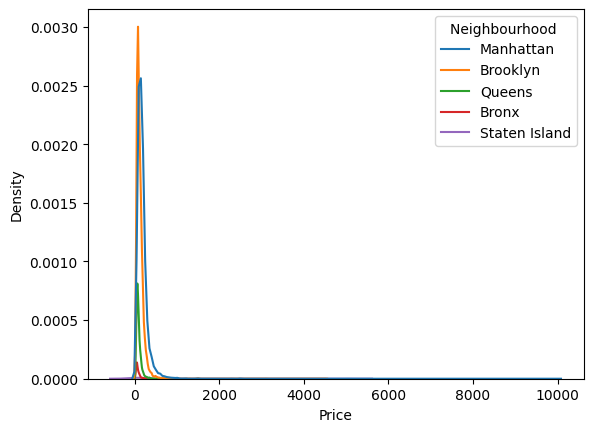

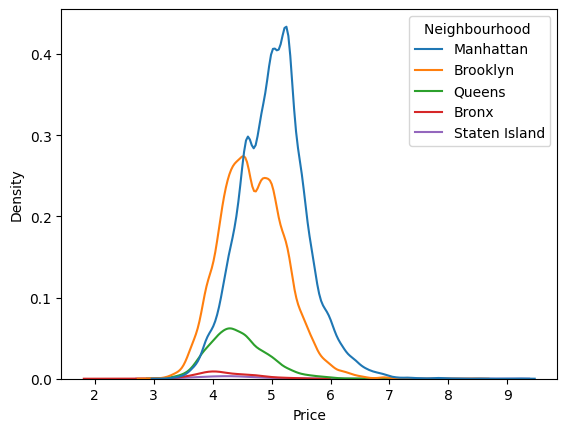

In [3]:
sns.kdeplot(x=df['Price'], hue=df['Neighbourhood '])
plt.show()
sns.kdeplot(x=np.log(df['Price']), hue=df['Neighbourhood '])
plt.show()

In [13]:
y = df['Price']
X = pd.get_dummies(df['Neighbourhood '], dtype='int')

from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=False).fit(X,y)

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
print(results)

        variable  coefficient
0          Bronx    75.276498
1       Brooklyn   127.747378
2      Manhattan   183.664286
3         Queens    96.857233
4  Staten Island   146.166667


The regression coefficients are the same as the means from part 1.

In [16]:
y = df['Price']
X = pd.get_dummies(df['Neighbourhood '], dtype='int', drop_first=True)

from sklearn import linear_model
reg = linear_model.LinearRegression().fit(X,y)

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
print(results)

        variable  coefficient
0       Brooklyn    52.470881
1      Manhattan   108.387789
2         Queens    21.580735
3  Staten Island    70.890169


In [17]:
print(reg.intercept_)

75.27649769585331


The coefficient for Bronx was dropped, and instead its coefficient became the intercept, meaning the coefficients for the other neighborhoods are being compared to Bronx, so adding these new coefficients to the Bronx coefficient/new intercept will give you the old coefficients.

In [26]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

y = df['Price']
X = df.loc[:,['Review Scores Rating', 'Neighbourhood '] ]
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=.2,
                                                    random_state=100)
Z_train = pd.concat([X_train['Review Scores Rating'],
                     pd.get_dummies(X_train['Neighbourhood '], dtype='int')], axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'],
                    pd.get_dummies(X_test['Neighbourhood '], dtype='int')], axis = 1)

reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train)

y_hat = reg.predict(Z_test)
print('r2: ', reg.score(Z_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) # R2

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
print(results)

r2:  0.06701086106947296
RMSE:  125.01092061382933
               variable  coefficient
0  Review Scores Rating     1.032257
1                 Bronx   -17.261392
2              Brooklyn    32.180888
3             Manhattan    89.421020
4                Queens     4.050208
5         Staten Island    61.576393


The most expensive that you can rent is a property in Manhattan.

In [34]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

y = df['Price']
X = df.loc[:,['Review Scores Rating', 'Neighbourhood ', 'Room Type'] ]
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=.2,
                                                    random_state=100)
Z_train = pd.concat([X_train['Review Scores Rating'],
                     pd.get_dummies(X_train['Neighbourhood '], dtype='int'),
                    pd.get_dummies(X_train['Room Type'], dtype='int')],
                    axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'],
                    pd.get_dummies(X_test['Neighbourhood '], dtype='int'),
                    pd.get_dummies(X_test['Room Type'], dtype='int')],
                    axis = 1)

reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train)

y_hat = reg.predict(Z_test)
print('r2: ', reg.score(Z_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) # R2

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
print(results)

r2:  0.22035348129282306
RMSE:  114.27692123130633
               variable  coefficient
0  Review Scores Rating     0.626912
1                 Bronx   -13.022765
2              Brooklyn    10.378456
3             Manhattan    53.693304
4                Queens    -6.833330
5         Staten Island    50.003022
6       Entire home/apt   110.617820
7          Private room     3.101341
8           Shared room   -19.500474


The most expensive is an entire home/apt in Manhattan.

The change in the RMSE from part 4 to 5 indicates that review scores are more predicitive for price based soley on location and less predicitve when you include more variables like Room Type.

In [53]:
print("Question 2:", '\n')
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('./linearRegression/data/cars_hw.csv')
df0 = df
print(df.head())
print(df.isnull().sum)


Question 2: 

   Unnamed: 0        Make  Make_Year   Color  Body_Type  Mileage_Run  \
0           1  Volkswagen       2017  silver      sedan        44611   
1           2     Hyundai       2016     red  crossover        20305   
2           3       Honda       2019   white        suv        29540   
3           4     Renault       2017  bronze  hatchback        35680   
4           5     Hyundai       2017  orange  hatchback        25126   

  No_of_Owners  Seating_Capacity Fuel_Type Transmission Transmission_Type  \
0          1st                 5    diesel      7-Speed         Automatic   
1          1st                 5    petrol      5-Speed            Manual   
2          2nd                 5    petrol      5-Speed            Manual   
3          1st                 5    petrol      5-Speed            Manual   
4          1st                 5    petrol      5-Speed            Manual   

    Price  
0  657000  
1  682000  
2  793000  
3  414000  
4  515000  
<bound method NDFr

<Axes: >

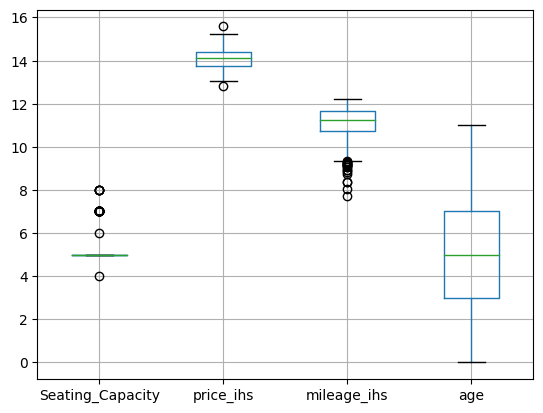

In [67]:
df['price_ihs'] = np.arcsinh(df['Price'])
df['mileage_ihs'] = np.arcsinh(df['Mileage_Run'])
df['age'] = max(df['Make_Year'])-df['Make_Year']
df = df.drop(['Price','Mileage_Run','Make_Year','Unnamed: 0'],axis=1)
df.boxplot()

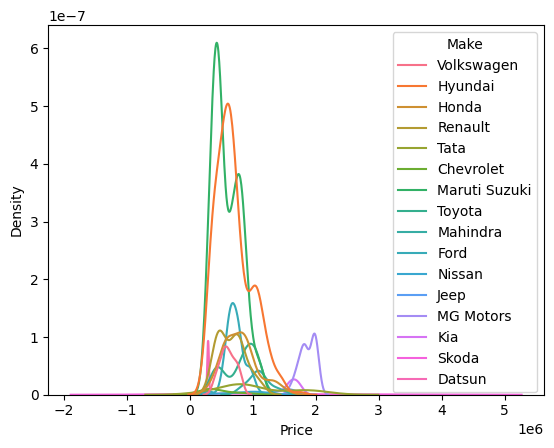

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Chevrolet,6.0,4.535000e+05,2.466064e+05,267000.0,288500.0,345500.0,537500.0,892000.0
Datsun,3.0,2.896667e+05,1.050397e+04,279000.0,284500.0,290000.0,295000.0,300000.0
Ford,52.0,7.211731e+05,1.409277e+05,290000.0,635000.0,707500.0,787000.0,1066000.0
Honda,73.0,7.989726e+05,2.665091e+05,316000.0,581000.0,785000.0,915000.0,1537000.0
Hyundai,305.0,6.918918e+05,2.791597e+05,248000.0,485000.0,638000.0,837000.0,1742000.0
Jeep,4.0,1.499500e+06,1.525134e+05,1290000.0,1447500.0,1529500.0,1581500.0,1649000.0
Kia,8.0,1.614750e+06,1.190567e+05,1369000.0,1579000.0,1628500.0,1705750.0,1741000.0
MG Motors,35.0,1.869457e+06,1.216611e+05,1589000.0,1786500.0,1848000.0,1978000.0,2019000.0
Mahindra,18.0,1.100167e+06,1.755493e+05,796000.0,1037000.0,1094500.0,1157000.0,1465000.0


In [65]:
sns.kdeplot(data = df0, x = 'Price', hue = 'Make')
plt.show()
df0['Price'].groupby(df0['Make']).describe()

Prices for MG Motors are the most expensive. Prices are typically normally distributed with a peak, except for a few companies like Toyota, which makes sense because from what I know, they market to a different groups of customers at different price points.

In [83]:
N = df.shape[0]
df = df.sample(frac=1, random_state=100)
train_size = int(.8*N)
df_train = df[0:train_size]
y_train = df_train['price_ihs']
df_test = df[train_size:]
y_test = df_test['price_ihs']

from sklearn import linear_model
var_numeric = ['age', 'mileage_ihs', 'Seating_Capacity']
X_train_numeric = df_train.loc[:, var_numeric]
reg_numeric = linear_model.LinearRegression().fit(X_train_numeric, y_train)
X_test_numeric = df_test.loc[:,var_numeric]
y_hat = reg_numeric.predict(X_test_numeric)
print("Numerical Regression:", '\n')
print('Numeric only r2: ', reg_numeric.score(X_test_numeric,y_test)) # R2
rmse_numeric = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('Numeric only RMSE: ', rmse_numeric) # R2

Numerical Regression: 

Numeric only r2:  0.39264524590092775
Numeric only RMSE:  0.3677490305135451


In [82]:
print("Categorical Regression:", '\n')
var_categorical = ['Make', 'Body_Type', 'Color', 'Fuel_Type', 'Transmission', 'Transmission_Type']
dummies = pd.DataFrame([])
for var in var_categorical:
  new_dummies = pd.get_dummies(df.loc[:,var], drop_first=True, dtype=int)
  dummies = pd.concat([dummies, new_dummies], axis=1, ignore_index=True)
  X_train_categorical = dummies.iloc[0:train_size,:]
  X_test_categorical = dummies.iloc[train_size:,:]

reg_categorical = linear_model.LinearRegression().fit(X_train_categorical, y_train)
y_hat_c = reg_categorical.predict(X_test_categorical)
print('Categorical only r2: ', reg_categorical.score(X_test_categorical,y_test)) # R2
rmse_c = np.sqrt( np.mean( (y_test - y_hat_c)**2 ))
print('Categorical only RMSE: ', rmse_c) # R2

Categorical Regression: 

Categorical only r2:  0.6912397287719191
Categorical only RMSE:  0.2735567764685883


In [81]:
X_train_all = pd.concat([X_train_numeric, X_train_categorical], axis = 1, ignore_index=True)
X_test_all = pd.concat([X_test_numeric, X_test_categorical], axis = 1, ignore_index = True)

reg_all = linear_model.LinearRegression().fit(X_train_all, y_train)
y_hat_all = reg_all.predict(X_test_all)
print('All r2: ', reg_all.score(X_test_all,y_test)) # R2
rmse_all = np.sqrt( np.mean( (y_test - y_hat_all)**2 ))
print('All RMSE: ', rmse_all) # R2

All r2:  0.8184210353485429
All RMSE:  0.2097826360594888


When using all variables, the regression is the most accurate, which makes sense. When separating between numeric and categorical variables, the categorical variables achieved a much higher r2 (0.69) than the numeric (0.39).

In [87]:
from sklearn.preprocessing import PolynomialFeatures
for d in np.arange(1,5):
    expander = PolynomialFeatures(degree=d,include_bias=False)

    Z = expander.fit_transform(X_test_numeric)
    names = expander.get_feature_names_out()
    X_test_d = pd.DataFrame(data=Z, columns = names)
    Z = expander.fit_transform(X_train_numeric)
    names = expander.get_feature_names_out()
    X_train_d = pd.DataFrame(data=Z, columns = names)
    X_train_d.reset_index(drop=True, inplace=True)
    X_train_categorical.reset_index(drop=True, inplace=True)
    X_train_all = pd.concat([X_train_d, X_train_categorical], axis=1, ignore_index=True)
    X_test_d.reset_index(drop=True, inplace=True)
    X_test_categorical.reset_index(drop=True, inplace=True)
    X_test_all = pd.concat([X_test_d, X_test_categorical], axis=1, ignore_index=True)
    reg_all = linear_model.LinearRegression().fit(X_train_all,y_train)
    print(d, ' r2: ', reg_all.score(X_test_all,y_test))
    y_hat_all = reg_all.predict(X_test_all)
    rmse_all = np.sqrt( np.mean( (y_test - y_hat_all)**2 ))
    print(d, 'RMSE: ', rmse_all)

1  r2:  0.38618733977274267
1 RMSE:  0.36969896923517553
2  r2:  0.3753033089250919
2 RMSE:  0.37296228900953626
3  r2:  0.30539562036182477
3 RMSE:  0.3932774791819162
4  r2:  -131757314674909.88
4 RMSE:  5416486.765192875


The best degree I was left with was 1, which had the highers r2 of 0.386.

<Axes: xlabel='price_ihs'>

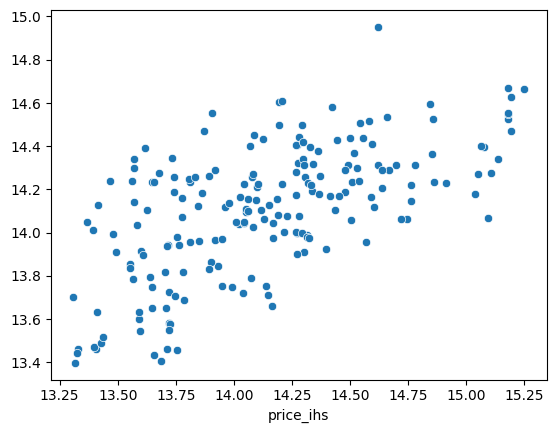

In [97]:
d = 1

expander = PolynomialFeatures(degree=d,include_bias=False)
Z = expander.fit_transform(X_test_numeric)
names = expander.get_feature_names_out()
X_test_d = pd.DataFrame(data=Z, columns = names)
#
Z = expander.fit_transform(X_train_numeric)
names = expander.get_feature_names_out()
X_train_d = pd.DataFrame(data=Z, columns = names)
#
X_train_d.reset_index(drop=True, inplace=True)
X_train_categorical.reset_index(drop=True, inplace=True)
X_train_all = pd.concat([X_train_d, X_train_categorical], axis=1)
X_train_all.columns = X_train_all.columns.astype(str)
#
X_test_d.reset_index(drop=True, inplace=True)
X_test_categorical.reset_index(drop=True, inplace=True)
X_test_all = pd.concat([X_test_d, X_test_categorical], axis=1)
X_test_all.columns = X_test_all.columns.astype(str)
#
reg_all = linear_model.LinearRegression().fit(X_train_all,y_train) # Run regression
#
y_hat_all = reg_all.predict(X_test_all)
residuals = y_test - y_hat_all

#
sns.scatterplot(x=y_test,y=y_hat_all)

The predicted values loosely line up along the diagonal, but a positive correlation is definitely visible.

<Axes: xlabel='price_ihs', ylabel='Density'>

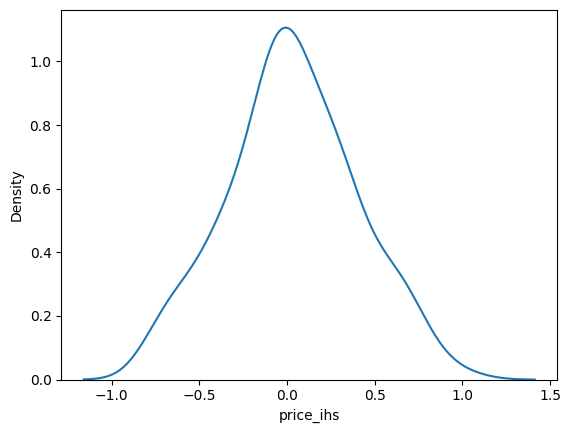

In [98]:
sns.kdeplot(residuals)

Residuals are bell shaped aroung 0 and are normally distributed, suggesting the model is not overestimating or underestimating the response variable. They are also extremely symmetrical and peaked, suggesting errors are consistent. It does tail slightly further in the positive direction, and both tails exceed 1/-1, meaning there are some outliers in both directions, so overall the model seems unbiased.
